In [1]:
import os
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import custom functions for data selection (eda_subfolder identical to eda, filepaths adjusted for use in eda folder)
from eda_subfolder import *
print(os.getcwd())

C:\Users\samjd\Documents\flatiron\project_phase2\phase_2_project_chicago-sf-seattle-ds-082420\eda


In [2]:
# NOTE: Year = year for analysis; create: False(read merged file created before)/True(create a merged file)
# Returns df_merged with selected columns from each file
df_merged = consolidate_data(year=2019, create=False)

C:\Users\samjd\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Sales file read.... (41818, 6)
Parcel file read.... (568310, 27)
ResBldg file read.... (517554, 30)
Merging data started....
Merging data ....done


In [3]:
df_merged['DistrictName'].unique()

array(['DUVALL', 'MAPLE VALLEY', 'SEATTLE', 'KIRKLAND', 'BELLEVUE',
       'KENT', 'REDMOND', 'KING COUNTY', 'AUBURN', 'BLACK DIAMOND',
       'FEDERAL WAY', 'ISSAQUAH', 'SHORELINE', 'KENMORE', 'SAMMAMISH',
       'RENTON', 'LAKE FOREST PARK', 'SeaTac', 'MERCER ISLAND',
       'ENUMCLAW', 'ALGONA', 'CLYDE HILL', 'CARNATION', 'DES MOINES',
       'SNOQUALMIE', 'NORTH BEND', 'COVINGTON', 'NEWCASTLE',
       'WOODINVILLE', 'TUKWILA', 'NORMANDY PARK', 'BOTHELL', 'BURIEN',
       'SKYKOMISH', 'MEDINA', 'YARROW POINT', 'PACIFIC', 'HUNTS POINT',
       'BEAUX ARTS', 'MILTON'], dtype=object)

In [3]:
# # check for columns of na's and zeros
# print((df_rp_sales == 0).all())
# print((df_parcel == 0).all())
# print((df_res_bldg == 0).all())
# print((df_lookup == 0).all())
# print((df_unit_breakdown == 0).all())
# print(df_rp_sales.isna().any())
# print(df_parcel.isna().any())
# print(df_res_bldg.isna().any())
# print(df_lookup.isna().any())
# print(df_unit_breakdown.isna().any())

In [4]:
def maj_min(df, drop=True):
    try:
        df.insert(0, 'Major+Minor', df.Major.astype(str) + df.Minor.astype(str))
        if drop==True:
            df.drop(['Major', 'Minor'], axis=1, inplace=True)
    except:
        print('columns missing')

    return df

In [4]:
df_merged.shape

(30199, 60)

In [5]:
# maj_min(df_res_bldg)
# # maj_min(df_lookup)
# maj_min(df_unit_breakdown)
# maj_min(df_parcel)

In [6]:
df_merged.columns

Index(['Merged_Key', 'DocumentDate', 'SalePrice', 'PropertyType',
       'PrincipalUse', 'PropertyClass', 'PropType', 'Area', 'SubArea',
       'DistrictName', 'SqFtLot', 'WaterSystem', 'SewerSystem', 'Access',
       'SeattleSkyline', 'LakeWashington', 'LakeSammamish',
       'SmallLakeRiverCreek', 'OtherView', 'WfntLocation', 'WfntFootage',
       'WfntBank', 'WfntPoorQuality', 'WfntRestrictedAccess',
       'WfntAccessRights', 'WfntProximityInfluence', 'TidelandShoreland',
       'TrafficNoise', 'AirportNoise', 'PowerLines', 'OtherNuisances',
       'BldgNbr', 'NbrLivingUnits', 'Address', 'BuildingNumber', 'ZipCode',
       'Stories', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf', 'SqFtTotLiving',
       'SqFtTotBasement', 'SqFtFinBasement', 'SqFtGarageAttached',
       'DaylightBasement', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck',
       'HeatSystem', 'Bedrooms', 'BathHalfCount', 'Bath3qtrCount',
       'BathFullCo

In [7]:
df_merged.head

<bound method NDFrame.head of        Merged_Key DocumentDate  SalePrice  PropertyType  PrincipalUse  \
0      2130430120         2019     560000             3             6   
1      9406520630         2019     435000            11             6   
2      6154900010         2019     775000            11             6   
3      3470500040         2019     648500            11             6   
4      9376300695         2019     550000             3             6   
...           ...          ...        ...           ...           ...   
30194  6113400046         2019     850000            11             6   
30195  4254000130         2019     650000            11             6   
30196  3985300006         2019     540000             3             6   
30197  5727500100         2019       3900             1             6   
30198  1313500290         2019     320000            11             6   

       PropertyClass PropType  Area  SubArea   DistrictName  ...  SqFtDeck  \
0              

In [8]:
df_merged.shape

(30199, 60)

In [9]:
len(df_merged.corr().SalePrice)

48

In [11]:
df_merged.corr().SalePrice > 0.12

SalePrice                True
PropertyType            False
PrincipalUse             True
PropertyClass           False
Area                    False
SubArea                 False
SqFtLot                 False
WaterSystem             False
SewerSystem             False
Access                  False
SeattleSkyline          False
LakeWashington           True
LakeSammamish           False
SmallLakeRiverCreek     False
OtherView               False
WfntLocation            False
WfntFootage             False
WfntBank                False
WfntPoorQuality         False
WfntRestrictedAccess    False
TidelandShoreland        True
TrafficNoise            False
AirportNoise            False
BldgNbr                 False
NbrLivingUnits           True
Stories                 False
SqFt1stFloor             True
SqFtHalfFloor           False
SqFt2ndFloor             True
SqFtUpperFloor          False
SqFtUnfinFull           False
SqFtUnfinHalf           False
SqFtTotLiving            True
SqFtTotBas

In [12]:
# create list of columns with correlations greater than a given percentage
min_percent = 0.12
corr = df_merged.corr()
strong_corrs = []
for key, value in dict(corr.SalePrice).items():
    if abs(value) > min_percent:
        strong_corrs.append(key)
print(strong_corrs)

['SalePrice', 'PrincipalUse', 'PropertyClass', 'LakeWashington', 'TidelandShoreland', 'NbrLivingUnits', 'SqFt1stFloor', 'SqFt2ndFloor', 'SqFtTotLiving', 'SqFtOpenPorch', 'Bedrooms', 'BathFullCount']


In [13]:
# df_merged = consolidate_data(year=2019, create=False)

In [14]:
#create dataframe of strongly correlated column
df_strong_corr = df_merged.drop(df_merged.columns.difference(strong_corrs), 1, inplace=False).copy()
df_strong_corr

,SalePrice,PrincipalUse,PropertyClass,LakeWashington,TidelandShoreland,NbrLivingUnits,SqFt1stFloor,SqFt2ndFloor,SqFtTotLiving,SqFtOpenPorch,Bedrooms,BathFullCount
0,560000,6,8,0,0,1,1930,0,1930,180,3,2
1,435000,6,8,0,0,1,1057,918,1975,45,3,1
2,775000,6,8,0,0,1,1040,0,2080,0,4,1
3,648500,6,8,0,0,1,1390,1910,3300,0,5,2
4,550000,6,8,0,0,1,370,540,1560,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
30194,850000,6,8,0,0,1,1146,1264,2896,96,5,2
30195,650000,6,8,0,0,1,940,1100,2040,590,4,2
30196,540000,6,8,0,0,1,1340,0,1340,110,3,1
30197,3900,6,7,0,0,1,910,0,1210,0,3,1


In [15]:
df_strong_corr.isna().any()

SalePrice            False
PrincipalUse         False
PropertyClass        False
LakeWashington       False
TidelandShoreland    False
NbrLivingUnits       False
SqFt1stFloor         False
SqFt2ndFloor         False
SqFtTotLiving        False
SqFtOpenPorch        False
Bedrooms             False
BathFullCount        False
dtype: bool

In [16]:
df_strong_corr.sort_values('SalePrice')

,SalePrice,PrincipalUse,PropertyClass,LakeWashington,TidelandShoreland,NbrLivingUnits,SqFt1stFloor,SqFt2ndFloor,SqFtTotLiving,SqFtOpenPorch,Bedrooms,BathFullCount
17115,-300,6,8,0,0,1,2370,0,3950,110,4,2
314,-100,6,8,0,0,1,1280,1320,3870,0,4,2
12368,5,6,8,0,0,1,610,660,1680,60,3,2
26924,5,6,8,0,0,1,1500,1590,3090,310,4,2
10215,10,6,8,0,0,1,1220,0,1220,180,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
27216,20985400,7,2,0,0,2,840,840,1680,0,4,2
29225,30000000,6,8,4,2,1,5220,130,5350,730,3,2
18583,31200000,7,2,0,0,1,1170,0,1170,0,3,1
25722,37500000,6,8,4,2,1,8760,0,9420,410,3,2


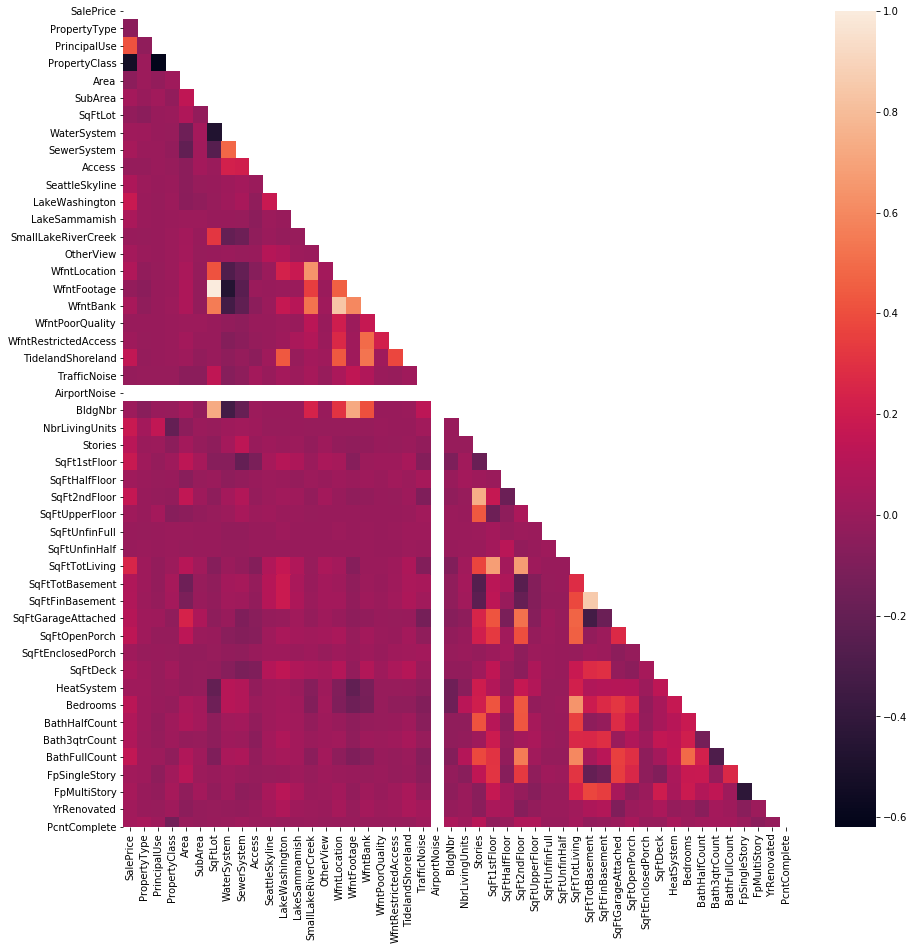

In [76]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig1, ax1 = plt.subplots(figsize=(15,15))
sns.heatmap(corr,mask=mask, ax=ax1)

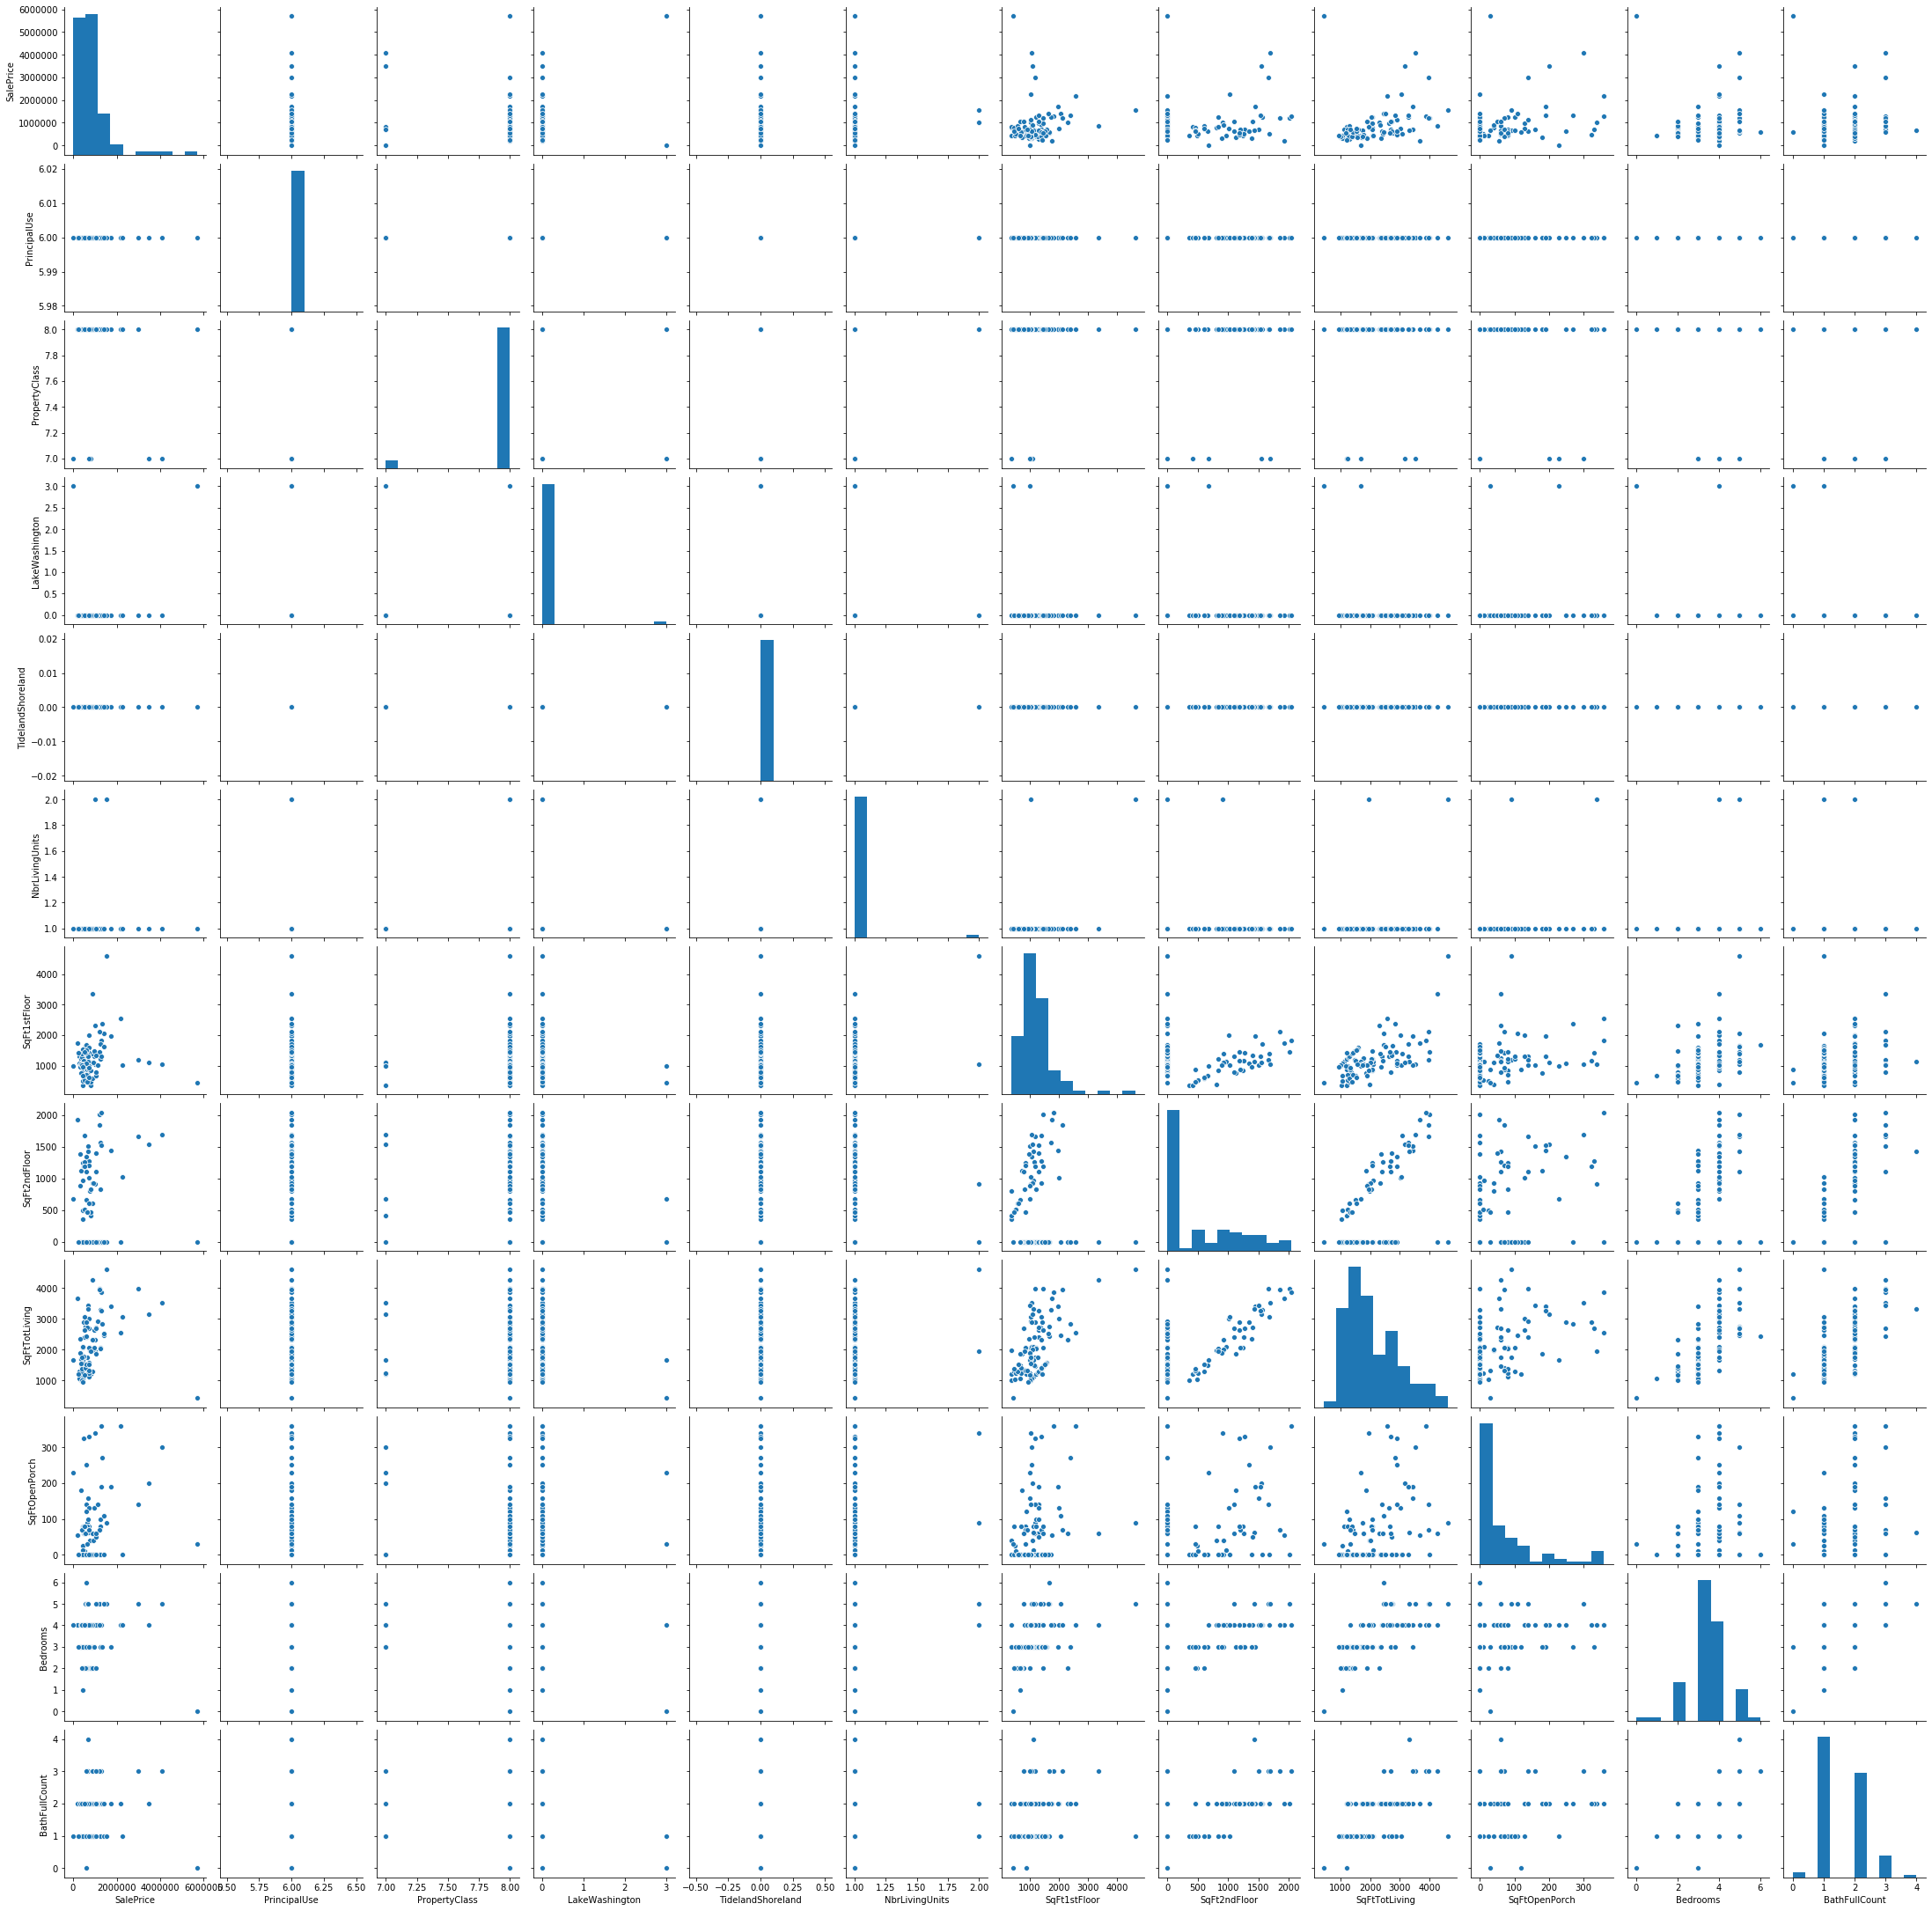

In [18]:
sns.pairplot(df_strong_corr.sample(n=100))

In [19]:
df_merged.columns

Index(['Merged_Key', 'DocumentDate', 'SalePrice', 'PropertyType',
       'PrincipalUse', 'PropertyClass', 'PropType', 'Area', 'SubArea',
       'DistrictName', 'SqFtLot', 'WaterSystem', 'SewerSystem', 'Access',
       'SeattleSkyline', 'LakeWashington', 'LakeSammamish',
       'SmallLakeRiverCreek', 'OtherView', 'WfntLocation', 'WfntFootage',
       'WfntBank', 'WfntPoorQuality', 'WfntRestrictedAccess',
       'WfntAccessRights', 'WfntProximityInfluence', 'TidelandShoreland',
       'TrafficNoise', 'AirportNoise', 'PowerLines', 'OtherNuisances',
       'BldgNbr', 'NbrLivingUnits', 'Address', 'BuildingNumber', 'ZipCode',
       'Stories', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf', 'SqFtTotLiving',
       'SqFtTotBasement', 'SqFtFinBasement', 'SqFtGarageAttached',
       'DaylightBasement', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck',
       'HeatSystem', 'Bedrooms', 'BathHalfCount', 'Bath3qtrCount',
       'BathFullCo

In [20]:
noise_cols = ['SalePrice', 'AirportNoise', 'TrafficNoise', 'PowerLines', 'OtherNuisances']

In [59]:
#create dataframe of strongly correlated column
df_noise = df_merged.drop(df_merged.columns.difference(noise_cols), 1, inplace=False).copy()
df_noise

,SalePrice,TrafficNoise,AirportNoise,PowerLines,OtherNuisances
0,560000,0,0,N,N
1,435000,0,0,N,N
2,775000,0,0,N,N
3,648500,0,0,N,N
4,550000,0,0,N,N
...,...,...,...,...,...
30194,850000,0,0,N,N
30195,650000,0,0,N,N
30196,540000,0,0,N,Y
30197,3900,3,0,N,N


In [32]:
for cat in noise_cols:
    if cat != 'SalePrice':
        unique_values = df_merged[cat].unique()
        print(cat, ': ', unique_values)

AirportNoise :  [0]
TrafficNoise :  [0 1 2 3]
PowerLines :  ['N' 'Y']
OtherNuisances :  ['N' 'Y']


In [124]:
# drop airportnoise values, all zero values
df_noise.drop('AirportNoise', axis=1)

# Create df of chosen predictors, n samples
n = 10000
noise_sample = df_noise.sample(n).dropna().copy()

# some chosen predictors are binary-categorical, convert "Y/N" to "1/0"
for pred in noise_sample:
    # convert all numeric values to floats
    try:
        noise_sample[pred] = noise_sample[pred].astype(int)
        
    # if value is non-numeric, convert to numeric
    except:
        for i in range(len(noise_sample[pred])):
            
            if str(noise_sample[pred].iloc[i]) == 'Y':
                noise_sample[pred].iloc[i] = 1
            
            elif str(noise_sample[pred].iloc[i]) == 'N':
                noise_sample[pred].iloc[i] = 0
            
            else:
                print('Value unaccounted for.')
                
# get saleprice samples
target = noise_sample.SalePrice

# preds = noise_sample.drop('SalePrice', axis=1, inplace=False)

In [105]:
noise_sample.head()

,SalePrice,TrafficNoise,AirportNoise,PowerLines,OtherNuisances
26623,595000,0,0,0,0
8159,1100000,0,0,0,0
24705,550000,0,0,0,0
3040,685000,0,0,0,0
28178,2515000,0,0,0,0


In [125]:
noise_sample.TrafficNoise = noise_sample.TrafficNoise/3

In [134]:
sales = noise_sample['SalePrice']
airport = noise_sample['AirportNoise']
noise_sample.drop(['SalePrice','AirportNoise'], axis=1, inplace=True)
noise_sample.insert(3,'AirportNoise', airport)
noise_sample.insert(4,'SalePrice', sales)

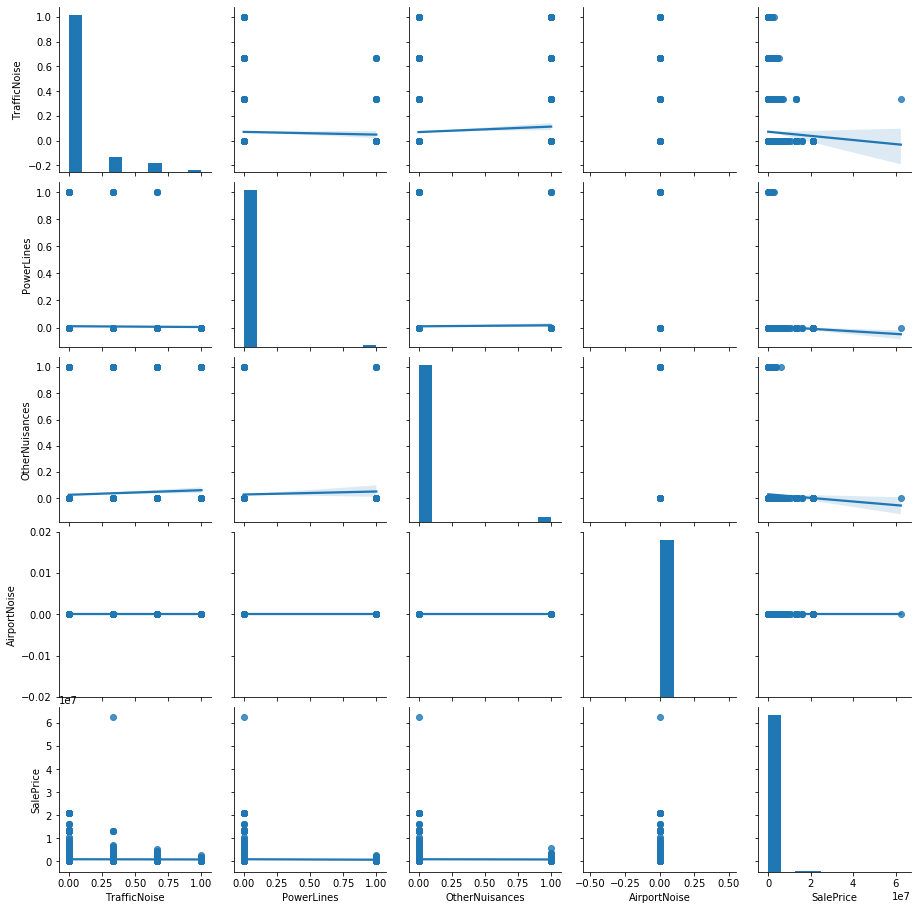

In [135]:
noise_plot = sns.pairplot(noise_sample, kind='reg')

In [136]:
noise_plot.savefig("noise_plot_regs.png")

In [42]:
preds_scaled = (preds-np.mean(preds))/np.std(preds)

In [43]:
# #drop airport noise, all values null (all zero values in df, no meaningful data)
# preds.drop('AirportNoise', axis=1, inplace=True)

In [54]:
# # transform categoricals into something useful/meaningful
# # runs only one, error otherwise
# noise_level = {'0': 'None', '1': 'Low', '2': 'Moderate', '3': 'High'}

# for i in range(len(noise_sample.TrafficNoise)):
#     noise_sample.TrafficNoise.iloc[i] = noise_level[noise_sample.TrafficNoise.iloc[i]]
# print(noise_sample.TrafficNoise.unique())

KeyError: 'None'

In [55]:
# noise_sample.TrafficNoise.astype('category')

26102        None
11706        None
29011    Moderate
28014        None
8151     Moderate
           ...   
29632        None
17382        None
14748        None
14788        None
22901        None
Name: TrafficNoise, Length: 10000, dtype: category
Categories (4, object): [High, Low, Moderate, None]

In [58]:
noise_sample.columns

Index(['SalePrice', 'TrafficNoise', 'AirportNoise', 'PowerLines',
       'OtherNuisances'],
      dtype='object')

In [137]:
noise_corr = noise_sample.corr()
noise_corr['SalePrice']

TrafficNoise     -0.012569
PowerLines       -0.013906
OtherNuisances   -0.011535
AirportNoise           NaN
SalePrice         1.000000
Name: SalePrice, dtype: float64

In [69]:
preds=noise_sample.drop('SalePrice', axis=1)

In [78]:
noise_corr.shape

(5, 5)

In [75]:
type(noise_corr)

pandas.core.series.Series

In [147]:
sales = noise_sample['SalePrice']
airport = noise_sample['AirportNoise']
noise_sample.drop(['SalePrice','AirportNoise'], axis=1, inplace=True)
noise_sample.insert(0,'AirportNoise', airport)
noise_sample.insert(4,'SalePrice', sales)

In [148]:
noise_corr = noise_sample.corr()
noise_corr['SalePrice']

AirportNoise           NaN
TrafficNoise     -0.012569
PowerLines       -0.013906
OtherNuisances   -0.011535
SalePrice         1.000000
Name: SalePrice, dtype: float64

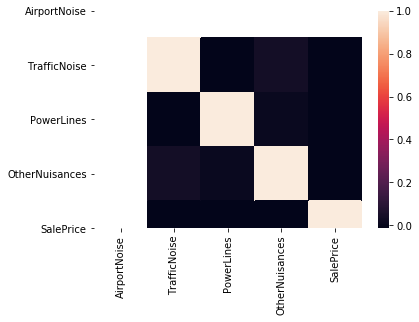

In [153]:
# mask = np.triu(np.ones_like(corr, dtype=np.bool))
# fig1, ax1 = plt.subplots(figsize=(15,15))
# sns.heatmap(corr,mask=mask, ax=ax1)

mask = np.triu(np.ones_like(noise_corr, dtype=np.bool))
fig2, ax2 = plt.subplots()
my_map = sns.heatmap(noise_corr, ax=ax2)
plt.savefig('my_map.png', pad_inches=1.5)

In [88]:
formula = 'SalePrice ~ TrafficNoise + PowerLines + OtherNuisances'
ols_model = ols(formula=formula, data=noise_sample)

ols_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.010
Date:                Wed, 30 Sep 2020   Prob (F-statistic):              0.387
Time:                        11:38:29   Log-Likelihood:            -1.5592e+05
No. Observations:               10000   AIC:                         3.118e+05
Df Residuals:                    9996   BIC:                         3.119e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       8.861e+05   1.55e+04     56.993      0.000    8.56e+05    9.17e+05
TrafficNoise   -1.928e+04   2.48e+04     -0.777      0.437   -6.79e+04    2.94e+04
PowerLines     -2.038e+05   1.36e+05     -1.499      0.134    -4.7e+05    6.26e+04
OtherNuisances -3.282e+04    7.9e+04     -0.415      0.678   -1.88e+05    1.22e+05
==============================================================================
Omnibus:                    20787.965   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        104075374.558
Skew:                          17.619   Prob(JB):                         0.00
Kurtosis:                     501.537   Cond. No.                         9.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
noise_pred_list = ['TrafficNoise', 'PowerLines', 'OtherNuisances']

for noise_type in noise_pred_list:
    formula = f'SalePrice ~ {noise_type}'
    ols_model = ols(formula=formula, data=noise_sample)
    print(f'\n\n\nSummary for {noise_type}')
    print(ols_model.fit().summary())




Summary for TrafficNoise
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6124
Date:                Wed, 30 Sep 2020   Prob (F-statistic):              0.434
Time:                        11:47:49   Log-Likelihood:            -1.5592e+05
No. Observations:               10000   AIC:                         3.118e+05
Df Residuals:                    9998   BIC:                         3.119e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     8.827e

In [84]:
model.params

const             8.840317e+05
TrafficNoise     -1.835836e+04
AirportNoise     -1.821370e-11
PowerLines       -1.401007e+05
OtherNuisances   -1.140062e+05
dtype: float64

## Addressing Point 6, ostensibly no correlation between nuisance and property values